In [1]:
# Dependencies and Twitter API Keys and Authorizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Create array of news twitter handles BBC, CBS, CNN, Fox, and New York times 
newsOutlets = ["BBCNews", "CBSNews","CNN", "FoxNews", "nytimes"]

In [3]:
# Print a tweet
test_tweet = api.user_timeline(newsOutlets[0])
print(json.dumps(test_tweet[0], sort_keys=True, indent=4))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Wed Jun 06 00:40:24 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "bbc.in/2HmKrwd",
                "expanded_url": "https://bbc.in/2HmKrwd",
                "indices": [
                    59,
                    82
                ],
                "url": "https://t.co/DVihP4PE2z"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 1,
    "favorited": false,
    "geo": null,
    "id": 1004161047173959680,
    "id_str": "1004161047173959680",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": false,
    "lang": "en",
    "place": null,
    "possibly_sensitive": false,
    "retweet_count": 0,
    "retweeted": false,
    "source": "<a href=\

In [4]:
# Create array for sentiments
sentiment_array = []

In [5]:
# Loop through all five media outlets
for outlet in newsOutlets:
    counter = 1   
    
    # For each outlet loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get user's tweets, specifying the page
        public_tweets = api.user_timeline(outlet, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            #Get info for each tweet 
                      
            # Get account handle and full user name
            tweet_target = tweet["user"]["screen_name"]
            tweet_name = tweet["user"]["name"]
            
            # Convert tweet date
            converted_time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            
            # Get tweet text
            tweet_text = tweet["text"]
            
            # Run sentiment analysis
            results = analyzer.polarity_scores(tweet["text"])
            pos = results["pos"]
            neg = results["neg"]
            neu = results["neu"]
            comp = results["compound"]
            
            # Place data in a dictionary
            sentiment = {"TweetsAgo":counter,
                         "Target": tweet_target,
                         "User": tweet_name,
                         "Date": converted_time,
                         "Text": tweet_text,
                         "Compound": comp,
                         "Positive": pos,
                         "Neutral": neu,
                         "Negative": neg
                        }
            
            # Append dictionary to master sentiment array
            sentiment_array.append(sentiment)

        # Increment counter
            counter +=1

In [6]:
# Make sure there are 100 tweets for each outlet (500 total)
len(sentiment_array)

500

In [7]:
# Create sentiments data frame
sentiments_df = pd.DataFrame(sentiment_array)

In [8]:
sentiments_df = sentiments_df[["TweetsAgo","Target","User","Date","Positive","Neutral","Negative","Compound","Text"]]
sentiments_df.head()

,TweetsAgo,Target,User,Date,Positive,Neutral,Negative,Compound,Text
0,1,BBCNews,BBC News (UK),2018-06-06 00:40:24+00:00,0.143,0.857,0.000,0.1280,Take a look inside the world's largest legal c...
1,2,BBCNews,BBC News (UK),2018-06-06 00:38:04+00:00,0.190,0.810,0.000,0.2755,Scotland and Britain 'cannot be mistaken for e...
2,3,BBCNews,BBC News (UK),2018-06-06 00:38:04+00:00,0.000,0.645,0.355,-0.6597,'How a TV show led to my cancer diagnosis' htt...
3,4,BBCNews,BBC News (UK),2018-06-06 00:38:04+00:00,0.000,0.818,0.182,-0.2500,Reality Check: Is a driver shortage messing up...
4,5,BBCNews,BBC News (UK),2018-06-06 00:38:02+00:00,0.000,0.845,0.155,-0.2960,Why beige carbs are the ones to avoid - Dr Xan...


In [9]:
# Sort data frame by target and tweets ago
sentiments_df = sentiments_df.sort_values(["Target","TweetsAgo"], ascending=[True, False])
sentiments_df.head()

,TweetsAgo,Target,User,Date,Positive,Neutral,Negative,Compound,Text
99,100,BBCNews,BBC News (UK),2018-06-05 11:50:49+00:00,0.202,0.743,0.055,0.5780,RT @bbclaurak: And least surprising story of t...
98,99,BBCNews,BBC News (UK),2018-06-05 11:57:55+00:00,0.188,0.812,0.000,0.4019,"""This is a project with benefits that reach fa..."
97,98,BBCNews,BBC News (UK),2018-06-05 12:01:35+00:00,0.000,1.000,0.000,0.0000,Loris Karius: Liverpool keeper referred for co...
96,97,BBCNews,BBC News (UK),2018-06-05 12:22:27+00:00,0.000,1.000,0.000,0.0000,Syphilis and gonorrhoea cases up by one-fifth ...
95,96,BBCNews,BBC News (UK),2018-06-05 12:24:46+00:00,0.000,1.000,0.000,0.0000,Tesco Bank hit by online glitch https://t.co/0...


In [10]:
# Save twitter data to CSV file
sentiments_df.to_csv("recentTweets.csv", encoding="utf-8", index=False)

In [11]:
# Create charting data frames for each type
BBC_df = sentiments_df[sentiments_df["Target"]=="BBCNews"]
CBS_df = sentiments_df[sentiments_df["Target"]=="CBSNews"]
CNN_df = sentiments_df[sentiments_df["Target"]=="CNN"]
FOX_df = sentiments_df[sentiments_df["Target"]=="FoxNews"]
NYT_df = sentiments_df[sentiments_df["Target"]=="nytimes"]

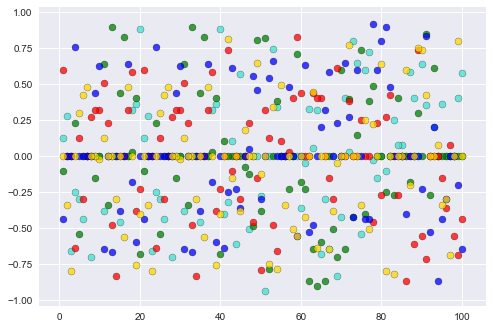

In [93]:
# Plot the News Outlets
# BBC
plt.scatter(BBC_df["TweetsAgo"], BBC_df["Compound"], marker="o", facecolors="turquoise", edgecolors="black", label="BBCWorld", alpha=0.75)

# CBS
plt.scatter(CBS_df["TweetsAgo"], CBS_df["Compound"], marker="o", facecolors="green", edgecolors="black", label="CBSNews", alpha=0.75)

# CNN
plt.scatter(CNN_df["TweetsAgo"], CNN_df["Compound"], marker="o", facecolors="red", edgecolors="black", label="CNN", alpha=0.75)

# Fox
plt.scatter(FOX_df["TweetsAgo"], FOX_df["Compound"], marker="o", facecolors="blue", edgecolors="black", label="FoxNews", alpha=0.75)

# New York Times
plt.scatter(NYT_df["TweetsAgo"], NYT_df["Compound"], marker="o", facecolors="gold", edgecolors="black", label="NYTimes", alpha=0.75)

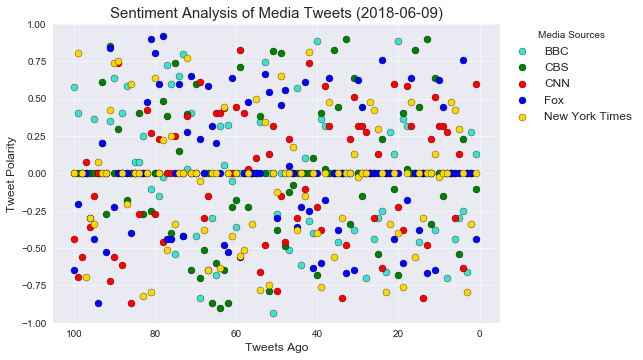

In [157]:
# Plot the News Outlets from above
plt.scatter(BBC_df["TweetsAgo"], BBC_df["Compound"], marker="o", facecolors="turquoise", edgecolors="black", label="BBC", alpha=1)
plt.scatter(CBS_df["TweetsAgo"], CBS_df["Compound"], marker="o", facecolors="green", edgecolors="black", label="CBS", alpha=1)
plt.scatter(CNN_df["TweetsAgo"], CNN_df["Compound"], marker="o", facecolors="red", edgecolors="black", label="CNN", alpha=1)
plt.scatter(FOX_df["TweetsAgo"], FOX_df["Compound"], marker="o", facecolors="blue", edgecolors="black", label="Fox", alpha=1)
plt.scatter(NYT_df["TweetsAgo"], NYT_df["Compound"], marker="o", facecolors="gold", edgecolors="black", label="New York Times", alpha=1)

# Set current date
curDate = datetime.now().date()

# Add labels and style
plt.title(f"Sentiment Analysis of Media Tweets ({curDate})", fontsize=15)
plt.xlabel("Tweets Ago", fontsize=12)
plt.ylabel("Tweet Polarity", fontsize=12)
plt.style.use('seaborn')
plt.grid(linestyle='-', linewidth='0.5', color='white')

# Set the x and y limits
plt.xlim(105, -5)
plt.ylim(-1, 1)

# Add the legend
lgnd= plt.legend(bbox_to_anchor=(1.32, 1.013), frameon = False, facecolor = 'white', loc="upper right", scatterpoints=1, fontsize=12, title="Media Sources")
plt.savefig('sentiment_analysis.png')
plt.show()

In [108]:
# Group the data by media outlet
groupedNews = sentiments_df.groupby(["User"], as_index=False)
groupedNews.head()

,TweetsAgo,Target,User,Date,Positive,Neutral,Negative,Compound,Text
99,100,BBCNews,BBC News (UK),2018-06-05 11:50:49+00:00,0.202,0.743,0.055,0.5780,RT @bbclaurak: And least surprising story of t...
98,99,BBCNews,BBC News (UK),2018-06-05 11:57:55+00:00,0.188,0.812,0.000,0.4019,"""This is a project with benefits that reach fa..."
97,98,BBCNews,BBC News (UK),2018-06-05 12:01:35+00:00,0.000,1.000,0.000,0.0000,Loris Karius: Liverpool keeper referred for co...
96,97,BBCNews,BBC News (UK),2018-06-05 12:22:27+00:00,0.000,1.000,0.000,0.0000,Syphilis and gonorrhoea cases up by one-fifth ...
95,96,BBCNews,BBC News (UK),2018-06-05 12:24:46+00:00,0.000,1.000,0.000,0.0000,Tesco Bank hit by online glitch https://t.co/0...
199,100,CBSNews,CBS News,2018-06-05 12:25:24+00:00,0.000,1.000,0.000,0.0000,“I just started thinking about this last night...
198,99,CBSNews,CBS News,2018-06-05 12:27:27+00:00,0.000,1.000,0.000,0.0000,“The first time i started having conversations...
197,98,CBSNews,CBS News,2018-06-05 12:30:35+00:00,0.000,1.000,0.000,0.0000,AHEAD on @CBSThisMorning: @Oprah will reveal h...
196,97,CBSNews,CBS News,2018-06-05 12:32:08+00:00,0.000,1.000,0.000,0.0000,RT @CBSThisMorning: .@Oprah recalls sitting in...
195,96,CBSNews,CBS News,2018-06-05 12:33:27+00:00,0.000,1.000,0.000,0.0000,Here’s a look at some of this morning’s headli...


In [121]:
# Get avg compound sentiment
avgcomp = groupedNews['Compound'].mean()
avgcomp.head()

,User,Compound
0,BBC News (UK),-0.000300
1,CBS News,0.009738
2,CNN,-0.010702
3,Fox News,0.024205
4,The New York Times,-0.043081


In [122]:
news_teams = avgcomp['User']
news_comp = avgcomp['Compound']
x_axis = np.arange(0,len(news_comp), 1)

In [114]:
news_comp

0   -0.000300
1    0.009738
2   -0.010702
3    0.024205
4   -0.043081
Name: Compound, dtype: float64

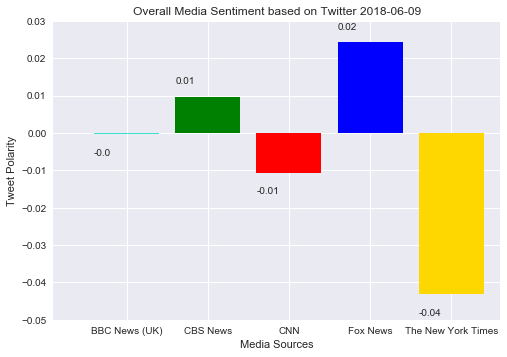

In [154]:
# group by SN and find average of each group
scores_by_org = avgcomp.groupby('User')['Compound'].mean()
scores_by_org

# Create barchart
plt.bar(x_axis, news_comp, color=["turquoise", "green", "red", "blue", "gold"], align = "edge")
tick_location = [value+.4 for value in x_axis]
plt.xticks(tick_location, news_teams)

# Set limits
plt.xlim(-.5, len(x_axis))
plt.ylim(-.05, .03)

# Titles and labels
plt.title(f"Overall Media Sentiment based on Twitter {curDate}")
plt.xlabel("Media Sources")
plt.ylabel("Tweet Polarity")

count = 0 # for x coord location of value label
# Create each value label
for score in scores_by_org: 
    if score < 0: #for neg scores, put label under
        height = score - .005
    else: # for + scores, put label above
        height = score + .004
    plt.text(count, height, str(round(score, 2)), multialignment = 'right', va = 'center')
    count += 1

In [156]:
# Save png
plt.savefig('overall_media.png')
plt.show()

<Figure size 576x396 with 0 Axes>